<a href="https://colab.research.google.com/github/CatarinaL/ddosLogs/blob/master/class_balance_and_redimensioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [1]:
!pip install category_encoders

import numpy as np
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import category_encoders as ce
from category_encoders.wrapper import PolynomialWrapper

     |████████████████████████████████| 81kB 5.2MB/s 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Data files are relatively large and I saved them to my google drive (saves time uploading them to use on colab). Originally obtained from: https://www.kaggle.com/jacobvs/ddos-attack-network-logs

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

np.random.seed(123)
file = "/content/drive/MyDrive/datasets/ddosLogs/final-dataset.arff"

data, meta = arff.loadarff(file)
df = pd.DataFrame(data=data)
df.info

Mounted at /content/drive


<bound method DataFrame.info of          SRC_ADD  DES_ADD  ...  LAST_PKT_RESEVED     PKT_CLASS
0           3.00    24.30  ...         50.021920     b'Normal'
1          15.00    24.15  ...         50.030211     b'Normal'
2          24.15    15.00  ...         50.060221  b'UDP-Flood'
3          24.90     9.00  ...         50.060098     b'Normal'
4          24.80     8.00  ...         50.061864     b'Normal'
...          ...      ...  ...               ...           ...
2160663    24.10    10.00  ...         50.040562     b'Normal'
2160664    24.12    12.00  ...         50.051067     b'Normal'
2160665     1.00    24.10  ...         50.013418     b'Normal'
2160666     5.00    24.50  ...         50.027339     b'Normal'
2160667    15.00    24.15  ...         50.030211     b'Normal'

[2160668 rows x 28 columns]>

Preprocessing: string formatting and type conversions

In [3]:
df2 = df.copy()
#decode byte strings to remove the "b" before the srting values at cols PKT_CLASS, NODE_NAME_FROM, NODE_NAME_TO, FLAGS, PKT_TYPE 
categoricals = ["NODE_NAME_FROM", "NODE_NAME_TO", "FLAGS", "PKT_TYPE", "PKT_CLASS"]
for categorical in categoricals:
  df2[categorical] = df2[categorical].apply(lambda x: x.decode('utf-8')).astype("category") 

intgs = ["SRC_ADD", "DES_ADD", "PKT_ID", "FROM_NODE", "TO_NODE", "FID"]
for intg in intgs:
  df2[intg] = df2[intg].astype('int64')

Looking at the imbalace in target class

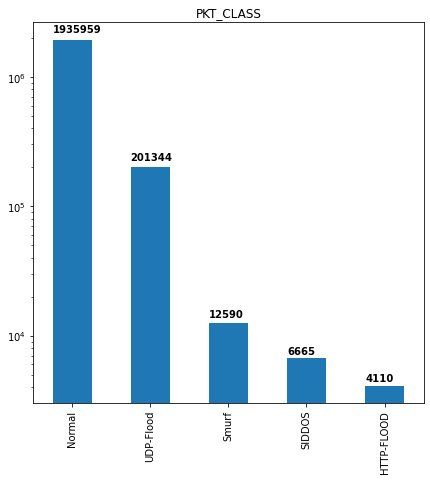

In [70]:
import math
fig, ax = plt.subplots(figsize=(7,7)) 

df2['PKT_CLASS'].value_counts().plot.bar(logy=True, subplots=True, )

for i, v in enumerate(df2['PKT_CLASS'].value_counts()):
    ax.text(i - .25, (ax.patches[i].get_height() + math.log(v)*v*0.01), str(v), 
            color='black', fontweight='bold')



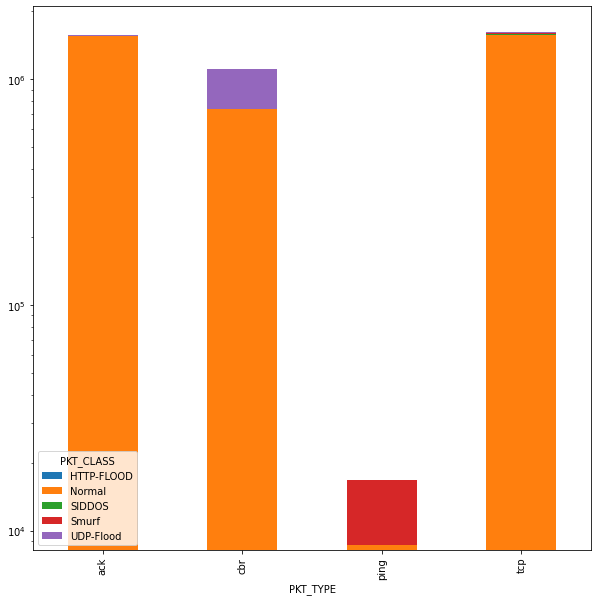

In [5]:
class_type=pd.pivot_table(df2[['PKT_CLASS', 'PKT_TYPE']], index=["PKT_TYPE"], columns="PKT_CLASS", aggfunc=np.count_nonzero).fillna(0).astype(int)
class_type.plot.bar(stacked=True, logy=True, figsize=(10,10))

In [ ]:
X = df2.iloc[:, 0:-1]
y = df2.iloc[:, [-1]]

We could probably undersample the bigger classes, or maybe even try a mix of SMOTE/ROSE with undersampling of the "Normal" class

Anyway, this needs to be validated for each model

In [ ]:
#resampling methods from scikit
from sklearn.utils import resample